# Preparation

In [1]:
# Read table
import pandas as pd

df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/project/data/data_table.pkl')
df['author'] =  ['Ivan Vazov' for i in range(100)] + [ 'Jordan Jovkov' for i in range(100)] # Add the corresponding authors
df

,аа,ааз,аба,абаджи,абич,абя,август,август тая,авджи,авджимихалев,авра,аврамиц,аврамов,австри,австрийск,австрийск химн,автома,авторитет,ага,ага остав,агитатор,агитаци,агн,аго,агони,ад,ада,адвока,адвока град,адвокатск,адов,адрес,адск,аз,аз аз,аз ах,аз баща,аз бог,аз боже,аз видя,...,ямурлу,ямурлу въз,ямурлу изл,ямурлу лице,яна,яна калмучк,янак,янк,янк разносвач,яня,яр,яра,яре,яребиц,ярк,ярк светли,яркочерв,ярослав,ярослав бързобегунек,ярост,ясен,ясен око,ясл,ясн,ясн вижда,ясн висок,ясн лича,ясн нон,ясн отпечата,ясн познава,ясн чува,яснот,ястреб,ястребов,ята,ятага,яхн,яхн бял,яхн кон,author
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.04303,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.012194,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033947,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Ivan Vazov
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.009808,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.014914,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Ivan Vazov
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038154,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.026926,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.035007,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.026063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Ivan Vazov
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.039291,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.011135,0.0,0.0,0.0,0.000000,0.039291,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.023593,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029482,0.0,0.0,0.0,Ivan Vazov
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.022027,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.050241,0.0,0.036715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Ivan Vazov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.015347,0.000000,0.0,0.0,0.0,0.013755,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.011830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.01202,0.0,0.0,0.007899,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Jordan Jovkov
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.035437,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020076,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.023613,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017718,0.0,0.0,0.0,Jordan Jovkov
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00

In [2]:
# Check the data types of each column (all should be float64)
df.dtypes

аа         float64
ааз        float64
аба        float64
абаджи     float64
абич       float64
            ...   
ятага      float64
яхн        float64
яхн бял    float64
яхн кон    float64
author      object
Length: 22628, dtype: object

In [3]:
# See quick statistics for each term
df.describe()

,аа,ааз,аба,абаджи,абич,абя,август,август тая,авджи,авджимихалев,авра,аврамиц,аврамов,австри,австрийск,австрийск химн,автома,авторитет,ага,ага остав,агитатор,агитаци,агн,аго,агони,ад,ада,адвока,адвока град,адвокатск,адов,адрес,адск,аз,аз аз,аз ах,аз баща,аз бог,аз боже,аз видя,...,яма,ямурлу,ямурлу въз,ямурлу изл,ямурлу лице,яна,яна калмучк,янак,янк,янк разносвач,яня,яр,яра,яре,яребиц,ярк,ярк светли,яркочерв,ярослав,ярослав бързобегунек,ярост,ясен,ясен око,ясл,ясн,ясн вижда,ясн висок,ясн лича,ясн нон,ясн отпечата,ясн познава,ясн чува,яснот,ястреб,ястребов,ята,ятага,яхн,яхн бял,яхн кон
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.000781,0.001112,0.000718,0.000758,0.000633,0.000342,0.000999,0.000301,0.000528,0.000406,0.002110,0.002299,0.000748,0.000425,0.001356,0.000918,0.000388,0.000782,0.003933,0.000424,0.000813,0.000497,0.001053,0.001560,0.000407,0.001422,0.000233,0.000920,0.000251,0.000269,0.000587,0.000369,0.000843,0.013174,0.000413,0.000326,0.000346,0.000358,0.000415,0.000359,...,0.000604,0.002731,0.000367,0.000290,0.000352,0.000533,0.000206,0.000454,0.001538,0.000181,0.000581,0.001179,0.001718,0.000459,0.000236,0.001195,0.000373,0.000246,0.000799,0.000799,0.002727,0.001868,0.000238,0.000283,0.004817,0.000717,0.000432,0.000357,0.000262,0.000426,0.000414,0.000227,0.000297,0.000975,0.000382,0.000391,0.001692,0.000989,0.000270,0.000542
std,0.009550,0.006646,0.004373,0.005322,0.004124,0.002789,0.009369,0.003037,0.004435,0.004302,0.026951,0.029397,0.007993,0.004237,0.010114,0.010473,0.003886,0.004603,0.017598,0.004243,0.005225,0.004969,0.004810,0.018168,0.004065,0.006337,0.002349,0.008516,0.002500,0.002689,0.004800,0.003007,0.005287,0.016371,0.004124,0.003301,0.003546,0.003638,0.004141,0.003584,...,0.003895,0.010506,0.003788,0.002894,0.003579,0.005655,0.002087,0.004552,0.012993,0.001817,0.004722,0.007057,0.007965,0.003301,0.002371,0.005987,0.003806,0.002454,0.006833,0.006833,0.008124,0.006563,0.002395,0.002836,0.008979,0.003792,0.003574,0.003616,0.002617,0.003613,0.004142,0.002331,0.002993,0.007400,0.003839,0.003186,0.007974,0.006378,0.002875,0.004459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

# Questions

**Which is the maximum weight for each word?**

In [4]:
df.iloc[:,:-1].max() # Take all but the last column

аа         0.133198
ааз        0.061933
аба        0.040458
абаджи     0.039934
абич       0.037809
             ...   
ята        0.028780
ятага      0.061737
яхн        0.068075
яхн бял    0.036988
яхн кон    0.041629
Length: 22627, dtype: float64

**Which is the "heaviest" weight?**

In [5]:
# Get the maximum value for each word
m = df.iloc[:,:-1].max().max()
m

0.8246857621104597

**Which word is this?**

In [6]:
for i, value in df.max().items():
  if value == m:
    idx = i
    break

print(f'Word = {idx}')
print(f'Weight = {df[idx].max()}')
print(f'Average for the column = {df[idx].mean()}')

Word = матаке
Weight = 0.8246857621104597
Average for the column = 0.004350381586439329


**Who used this word?**

In [7]:
for (i, val) in enumerate(df[idx]):
  if val == m:
    idx = i
    break

df.iloc[idx].author

'Jordan Jovkov'

**Which is the "heaviest" weight overall?**

In [8]:
m = df.mean().max()
m

0.054959447633782965

**Which word is this?**

In [9]:
idx = -1

for (i, value) in df.mean().items():
  if df[i].mean() == m:
    idx = i
    break

print(f'Word = {idx}')
print(f'Average for the column = {df[idx].mean()}')
print(f'Max for the column = {df[idx].max()}')

Word = огнянов
Average for the column = 0.054959447633782965
Max for the column = 0.40446204822014203


**Who used this word?**

In [10]:
for (i, val) in enumerate(df[idx]):
  if val > 0:
    print(df.iloc[i].author)

Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov
Ivan Vazov


**Which words have at least one weight greater than or equal to 0.5?**

In [11]:
for i, value in df.iloc[:,:-1].items():
  if df[i].max() >= 0.5:
    print(f'Word = {i} | Average for the column = {df[i].mean()} | Max for the column = {df[i].max()}')

Word = бели | Average for the column = 0.005094021155354629 | Max for the column = 0.5217899076014385
Word = божур | Average for the column = 0.005906120792605554 | Max for the column = 0.6007266366219223
Word = гороломов | Average for the column = 0.04957710580824028 | Max for the column = 0.6413245447320821
Word = драга | Average for the column = 0.003099101977584498 | Max for the column = 0.5451757329960495
Word = драгот | Average for the column = 0.006513524740799633 | Max for the column = 0.6696244490792553
Word = дядо щер | Average for the column = 0.003191061484258806 | Max for the column = 0.5125655722265561
Word = заманов | Average for the column = 0.006371388242630604 | Max for the column = 0.5074578688809643
Word = ива бели | Average for the column = 0.005288546670806218 | Max for the column = 0.5888028560325536
Word = индж | Average for the column = 0.012974084288178216 | Max for the column = 0.8140654214314847
Word = кали | Average for the column = 0.004011867633509017 | M

**Which words have overall weights greater than or equal to 0.05?**

In [12]:
for i, value in df.iloc[:,:-1].items():
  if df[i].mean() >= 0.05:
    print(f'Word = {i} | Average for the column = {df[i].mean()} | Max for the column = {df[i].max()}')

Word = нон | Average for the column = 0.051159938735133456 | Max for the column = 0.6052720673897316
Word = огнянов | Average for the column = 0.054959447633782965 | Max for the column = 0.40446204822014203


**Which words have overall weights equal to the minimum overall weight?**

In [13]:
m = df.mean().min()
m

0.00017266960274176107

In [14]:
for i, value in df.mean().items():
  if df[i].mean() == m:
    print(f'Word = {i} | Average for the column = {df[i].mean()} | Max for the column = {df[i].max()}')

Word = гледа сарандовиц | Average for the column = 0.00017266960274176107 | Max for the column = 0.01818616827913956
Word = поглед сарандовиц | Average for the column = 0.00017266960274176107 | Max for the column = 0.01818616827913956


**Plot stuff**

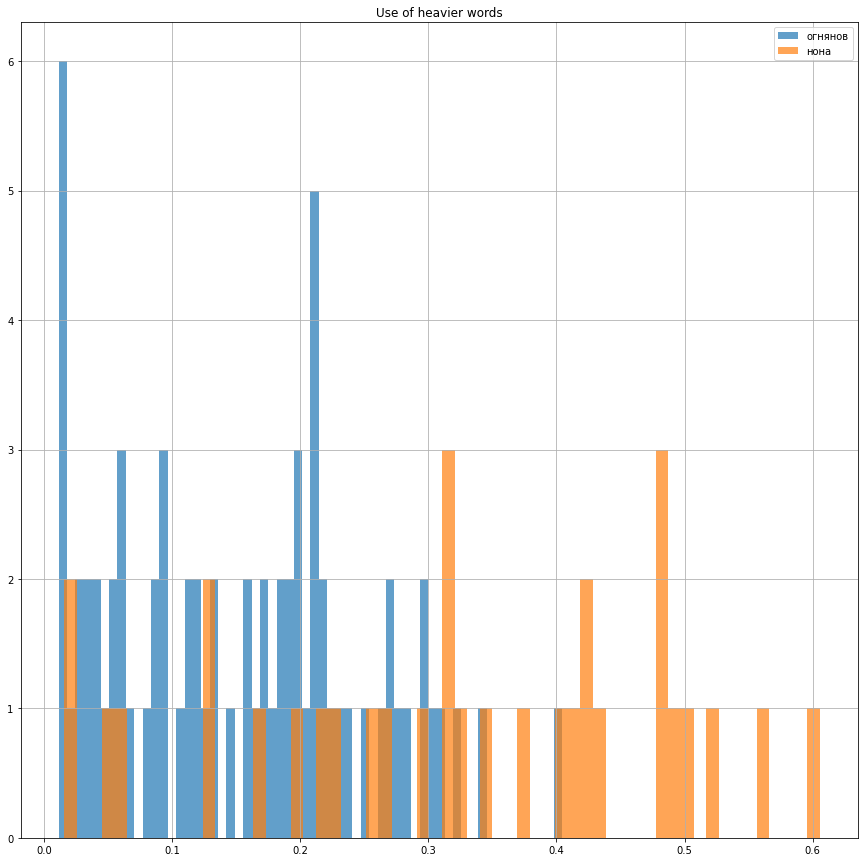

In [15]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 15))
plt.title('Use of heavier words')
df[df.огнянов > 0].огнянов.hist(alpha = 0.7, bins = 60, label = 'огнянов')
df[df.нон > 0].нон.hist(alpha = 0.7, bins = 60, label = 'нона')
plt.legend(loc = 'upper right')

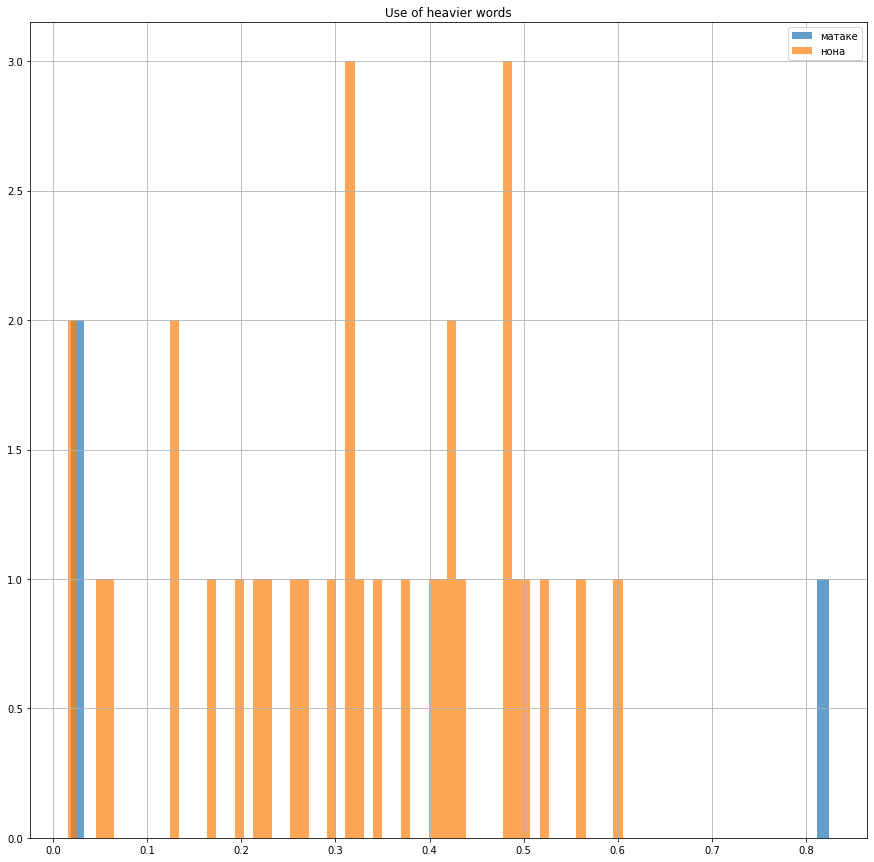

In [16]:
fig = plt.figure(figsize=(15, 15))
plt.title('Use of heavier words')
df[df.матаке > 0].матаке.hist(alpha = 0.7, bins = 60, label = 'матаке')
df[df.нон > 0].нон.hist(alpha = 0.7, bins = 60, label = 'нона')
plt.legend(loc = 'upper right')

In [ ]:
fig = plt.figure(figsize=(30, 15))
plt.title('Use of heavier words')
df[df.крайн > 0.1].крайн.hist(alpha = 0.7, bins = 30, label = 'нкрайнона')
df[df.ле > 0.1].ле.hist(alpha = 0.7, bins = 30, label = 'ле')
df[df.люцка > 0.1].люцка.hist(alpha = 0.7, bins = 30, label = 'люцка')
df[df.марийк > 0.1].марийк.hist(alpha = 0.7, bins = 30, label = 'марийк')
df[df.марк > 0.1].марк.hist(alpha = 0.7, bins = 30, label = 'марк')
df[df.матаке > 0.1].матаке.hist(alpha = 0.7, bins = 30, label = 'матаке')
df[df.моск > 0.1].моск.hist(alpha = 0.7, bins = 30, label = 'моск')
df[df.мъглов > 0.1].мъглов.hist(alpha = 0.7, bins = 30, label = 'мъглов')
df[df.нон > 0.1].нон.hist(alpha = 0.7, bins = 30, label = 'нон')
df[df.палазов > 0.1].палазов.hist(alpha = 0.7, bins = 30, label = 'палазов')
df[df.сарандовиц > 0.1].сарандовиц.hist(alpha = 0.7, bins = 30, label = 'сарандовиц')
df[df.стефа > 0.1].стефа.hist(alpha = 0.7, bins = 30, label = 'стефа')
df[df.танк > 0.1].танк.hist(alpha = 0.7, bins = 30, label = 'танк')
df[df.темелк > 0.1].темелк.hist(alpha = 0.7, bins = 30, label = 'темелк')
df[df.драга > 0.1].драга.hist(alpha = 0.7, bins = 30, label = 'драга')
df[df.драгот > 0.1].драгот.hist(alpha = 0.7, bins = 30, label = 'драгот')
df[df.заманов > 0.1].заманов.hist(alpha = 0.7, bins = 30, label = 'заманов')
df[df['дядо щер'] > 0.1]['дядо щер'].hist(alpha = 0.7, bins = 30, label = 'дядо щер')
df[df['ива бели'] > 0.1]['ива бели'].hist(alpha = 0.7, bins = 30, label = 'ива бели')
plt.legend(loc = 'upper right')